In [36]:
# importing some useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline

import pickle 

In [37]:
# Loading the dataset
df= pd.read_csv("phishing_site_urls.csv")

In [38]:
df.head() # Displaying the first few rows of the dataset

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [39]:
# Displaying information about the dataset, including data types and missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [40]:
df.shape # Getting the shape (number of rows and columns) of the dataset

(549346, 2)

In [41]:
# Checking for missing values in the dataset
df.isnull().sum()

URL      0
Label    0
dtype: int64

<Axes: xlabel='Label', ylabel='count'>

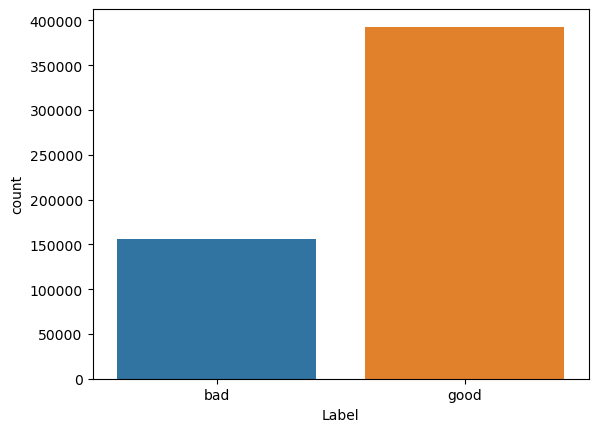

In [42]:
sns.countplot(x="Label",data=df) # Creating a countplot to visualize the distribution of 'Label' in the dataset

# Tokenizing the URL strings using a regular expression tokenizer

In [43]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [44]:
tokenizer.tokenize(df.URL[0]) # this will fetch all the words from the first URL

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [45]:
# Tokenizing all the URL strings in the dataset
print('Getting words tokenized ...')
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))

Getting words tokenized ...


In [46]:
df.sample(5)

,URL,Label,text_tokenized
504607,mebdco.com/t67bg,bad,"[mebdco, com, t, bg]"
508070,gamehedthed.ru/gate.php,bad,"[gamehedthed, ru, gate, php]"
187883,finance.utah.gov/,good,"[finance, utah, gov]"
336399,featurepics.com/online/Flowers-Broken-Vase-Pic...,good,"[featurepics, com, online, Flowers, Broken, Va..."
199370,icehockey.wikia.com/wiki/Maxime_Boisclair,good,"[icehockey, wikia, com, wiki, Maxime, Boisclair]"


In [13]:
# Applying Snowball stemming to the tokenized words
stemmer = SnowballStemmer("english") # choose a language

In [47]:
# Getting all the stemmed words
print('Getting words stemmed ...')
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

Getting words stemmed ...


In [48]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed
9121,pastehtml.com/view/bebrrj6ce.html,bad,"[pastehtml, com, view, bebrrj, ce, html]","[pastehtml, com, view, bebrrj, ce, html]"
528105,ns06.dnsalias.com/,bad,"[ns, dnsalias, com]","[ns, dnsalia, com]"
303394,checkoutmycards.com/Players/Baseball/Frank_Tho...,good,"[checkoutmycards, com, Players, Baseball, Fran...","[checkoutmycard, com, player, basebal, frank, ..."
189371,forum.love-fords.org/content.php?205-1961-Merc...,good,"[forum, love, fords, org, content, php, Mercur...","[forum, love, ford, org, content, php, mercuri..."
370068,lansdowneplace.com/,good,"[lansdowneplace, com]","[lansdowneplac, com]"


In [49]:
# Stemming all the tokenized words in the dataset
print('Get joiningwords ...')
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

Get joiningwords ...


In [50]:
# Creating separate DataFrames for 'bad' and 'good' sites
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [18]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [19]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [20]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


# Creating a machine learning model
# Using CountVectorizer to convert text data into a matrix of token counts

In [21]:
cv = CountVectorizer()

In [22]:
feature = cv.fit_transform(df.text_sent) #transform all text which we tokenize and stemed

In [23]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [25]:
trainX, testX, trainY, testY = train_test_split(feature, df.Label)

In [26]:
# Training a Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()
lr.fit(trainX,trainY)

C:\Users\Darji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# Calculating and displaying the accuracy of the Logistic Regression model on the test data
lr.score(testX,testY)

0.9633237947530527

Training Accuracy : 0.9775368984658103
Testing Accuracy : 0.9633237947530527

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         bad       0.90      0.97      0.93     36784
        good       0.99      0.96      0.97    100553

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

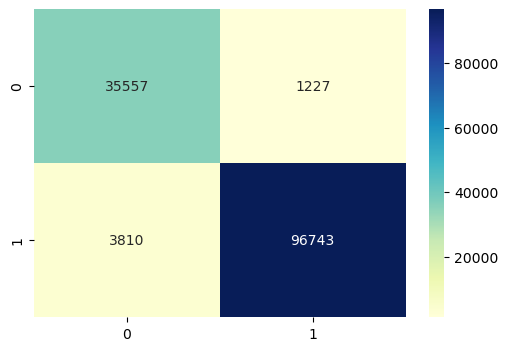

In [31]:
# creating confusing matrix
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))

con_mat = confusion_matrix(lr.predict(testX), testY)

print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [32]:
# Logistic Regression is the best-fit model, creating a sklearn pipeline using Logistic Regression
pipeline_ls = make_pipeline(CountVectorizer(tokenizer=RegexpTokenizer(r'[A-Za-z]+').tokenize, stop_words='english'),
                            LogisticRegression())

trainX, testX, trainY, testY = train_test_split(df.URL, df.Label, test_size=30)

pipeline_ls.fit(trainX, trainY)

C:\Users\Darji\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Darji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

### Dump the model in pickle File

In [33]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [34]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9666666666666667
